In [ ]:
# Run this cell once when starting on notebook.
# On Google Colab, wait for the Google Drive permission prompts before proceeding
import matplotlib.pyplot as plt
%matplotlib inline
import os
import sys
from datascience import *
import numpy as np
import math
DATA_FILENAME="data/ILPD.csv"

# CS5A S25 Final Project: LiverDisease

## Analysis of Liver Disease Risk Factors

### Objective
This project analyzes patient records to investigate the relationship between Age, Gender, and Liver Disease diagnosis. Using statistical hypothesis testing (A/B testing), I aim to determine if age is a significant risk factor. 

### Data Source
The dataset used in this analysis is the **Indian Liver Patient Dataset** (ILPD), sourced from the **UCI Machine Learning Repository**. Death by liver cirrhosis continues to increase, given the increase in alcohol consumption rates, chronic hepatitis infections, and obesity-related liver disease. Notwithstanding the high mortality of this disease, liver diseases do not affect all sub-populations equally. The early detection of pathology is a determinant of patient outcomes.
* **Source:** [UCI Machine Learning Repository - ILPD](https://archive.ics.uci.edu/dataset/225/ilpd+indian+liver+patient+dataset)
* **Description:** Contains 583 patient records collected from the North East of Andhra Pradesh, India.
* **Citation:** Ramana, Bendi and N. Venkateswarlu. "ILPD (Indian Liver Patient Dataset)." UCI Machine Learning Repository, 2022, https://doi.org/10.24432/C5D02C.
---------------------------------------------------------------------------------------------------------------------------------------
* **Age**: Patient's age.
* **Gender**: Patient's gender.
* **Total Bilirubin (TB)**: The total amount of bilirubin in the blood, a yellow pigment produced by the breakdown of red blood cells.
* **Direct Bilirubin (DB)**: The direct fraction of bilirubin, specifically associated with liver function.
* **Total Proteins (TP)**: The total amount of proteins in the blood, including albumin and globulins.
* **Albumin (ALB)**: A protein synthesized by the liver, crucial for maintaining blood volume and pressure.
* **A/G Ratio**: The ratio of albumin to globulins, providing insights into liver and kidney function.
* **SGPT (Serum Glutamic Pyruvic Transaminase)**: An enzyme indicating liver health; elevated levels may suggest liver damage.
* **SGOT (Serum Glutamic Oxaloacetic Transaminase)**: Another liver enzyme reflecting liver function; elevated levels may indicate liver problems.
* **Alkphos (Alkaline Phosphatase)**: An enzyme associated with the biliary system; elevated levels may indicate liver or bone issues.
*  **Selector**: Class labels for healthy (*1*) vs diagnosed with liver desease (*2*) patients.

In [7]:
# Read the dataset
patients_uncleaned = Table.read_table(DATA_FILENAME)

# Display the first few rows of the table
patients_uncleaned.show(10)

Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
62,Male,7.3,4.1,490,60,68,7,3.3,0.89,1
58,Male,1,0.4,182,14,20,6.8,3.4,1,1
72,Male,3.9,2,195,27,59,7.3,2.4,0.4,1
46,Male,1.8,0.7,208,19,14,7.6,4.4,1.3,1
26,Female,0.9,0.2,154,16,12,7,3.5,1,1
29,Female,0.9,0.3,202,14,11,6.7,3.6,1.1,1
17,Male,0.9,0.3,202,22,19,7.4,4.1,1.2,2
55,Male,0.7,0.2,290,53,58,6.8,3.4,1,1


In [ ]:
#def the function in order to clean table
def count_nans(table, column_name):
    return np.count_nonzero(np.isnan(table.column(column_name)))

# checking to see which rows as nans in it
age_nans = count_nans(patients_uncleaned, "Age")
print(f"Number of missing values in the 'Age' column: {age_nans}")

tb_nans = count_nans(patients_uncleaned, "TB")
print(f"Number of missing values in the TB column: {tb_nans}")

db_nans = count_nans(patients_uncleaned, "DB")
print(f"Number of missing values in the DB column: {db_nans}")

Alkphos_nans = count_nans(patients_uncleaned, "Alkphos")
print(f"Number of missing values in the Alkphos column: {Alkphos_nans}")

alb_nans = count_nans(patients_uncleaned, "ALB")
print(f"Number of missing values in the ALB column: {alb_nans}")

Sgpt_nans = count_nans(patients_uncleaned, "Sgpt")
print(f"Number of missing values in the Sgpt column: {Sgpt_nans}")


Sgot_nans = count_nans(patients_uncleaned, "Sgot")
print(f"Number of missing values in the Sgot column: {Sgot_nans}")

TP_nans = count_nans(patients_uncleaned, "TP")
print(f"Number of missing values in the TP column: {TP_nans}")

ALB_nans = count_nans(patients_uncleaned, "ALB")
print(f"Number of missing values in the ALB column: {ALB_nans}")

ag_ratio_nans = count_nans(patients_uncleaned, "A/G Ratio")
print(f"Number of missing values in the A/G Ratio column: {ag_ratio_nans}")

selector_nans = count_nans(patients_uncleaned, "Selector")
print(f"Number of missing values in the Selector column: {selector_nans}")


#filter the row
patients = patients_uncleaned.where(np.logical_not(np.isnan(patients_uncleaned.column('A/G Ratio'))))
patients

Number of missing values in the 'Age' column: 0
Number of missing values in the TB column: 0
Number of missing values in the DB column: 0
Number of missing values in the Alkphos column: 0
Number of missing values in the ALB column: 0
Number of missing values in the Sgpt column: 0
Number of missing values in the Sgot column: 0
Number of missing values in the TP column: 0
Number of missing values in the ALB column: 0
Number of missing values in the A/G Ratio column: 4
Number of missing values in the Selector column: 0


Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
65,Female,0.7,0.1,187,16,18,6.8,3.3,0.9,1
62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
62,Male,7.3,4.1,490,60,68,7,3.3,0.89,1
58,Male,1,0.4,182,14,20,6.8,3.4,1,1
72,Male,3.9,2,195,27,59,7.3,2.4,0.4,1
46,Male,1.8,0.7,208,19,14,7.6,4.4,1.3,1
26,Female,0.9,0.2,154,16,12,7,3.5,1,1
29,Female,0.9,0.3,202,14,11,6.7,3.6,1.1,1
17,Male,0.9,0.3,202,22,19,7.4,4.1,1.2,2
55,Male,0.7,0.2,290,53,58,6.8,3.4,1,1


In [ ]:
#CHECK TO SEE IF IT IS FILTERED
ag_ratio_nans = count_nans(patients, "A/G Ratio")
print(f"Number of nans in A/G: {age_nans}")

Number of nans in A/G: 0


I began with defining a function that would count the nans called count_nans in table so I can find with columns has rows with nans in it. So I would store each column in a name like "age_nans" or "column name_nans" when counting the number of nans in the rows. I would find the nans by using the count_nans and inputting the dataset and the column name that I was searching the nans in. When I did it for all of the tables, I found out that A/G ratio column was the only one that had the nans. In order to delete the rows or the filter out the missing data I would start with the dataset provided which is patients_unclean and used the where function to select the specific row that I want which was "A/G ratio" and use the are.not_equal_to filter out the nans in the column. To double check that the table is now clean, I would use the same steps in the beginning when checking whether there was any nans in it.

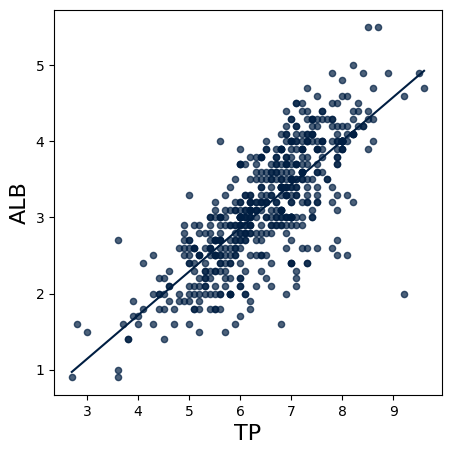

In [ ]:
#display table
patients

#visualization + fitted line
patients.scatter("TP", "ALB", fit_line = True) # positive correlation

In [ ]:
#to find how strong the correlation it is, even though it looks like there is a positive correlation based on the scatterplot
total_bilirubin = patients.column("TP")
albumin = patients.column("ALB")
correlation = np.corrcoef(total_bilirubin, albumin)
print(correlation)

[[ 1.          0.78311217]
 [ 0.78311217  1.        ]]


Given that in the beginning of the code, I didn't want to keep scrolling up and down so I ended up loading the table in this problem. Given that we wanted to see if there was a correlation between the relationship between total bilirum and albumin, I thought that a scatterplot would be best choice given that they both contain values in numbers and it would be the easiest to see whether the variables are related. I produced a scatterplot by using .scatter() and inputting the two columns that I wanted which were "TB" and "ALB".

Futhermore, in order to calculation how strong the correlation between the two values where I first had to turn the two columns TP and ALB and extract the data from the patients table invidually by using the .column("column name") because so that it would give me an array which I would store in total_bilirium and albumin. That way, I can manipulate the data to find the correlation. So, to find the correlation I would use np.corrcoef() and input the two data sets that I want to find the correlation which is total_proteins and albumin. It gave me about .79 proximation which shows that there is a strong correlation because the correlation coefficient range is from -1 to 0 or 0 to 1. Since the outcome is around 0.79, it is safe to say that there is a strong correlation between TP and ALB.

From this what I can infer is that there is positive correlation between TB and ALB when one increase the other also increases. This correlation can play a major role when testing whether you have liver dieases or not because ALB is a protein that transport TB to the liver as it can give an indicator for liver dieases.

Analyzing the distribution of the ages of subjects in the dataset. Are most of the subjects young, old, or is there a uniform distribution across different ages?

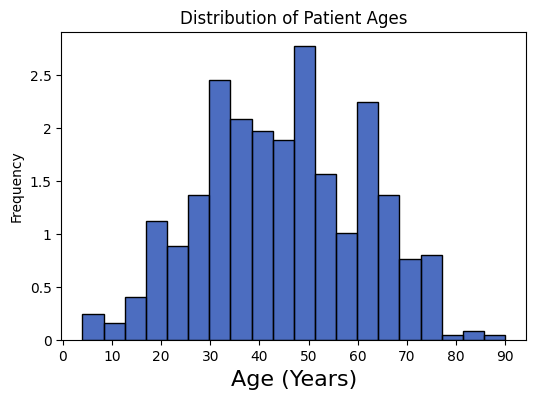

In [ ]:
patients.hist("Age", bins=20)

custom_ticks = sorted(list(set([] + list(np.arange(0, 91, 10)))))

plt.xticks(custom_ticks)
plt.xlabel("Age (Years)")
plt.ylabel("Frequency")
plt.title("Distribution of Patient Ages")
plt.show()

In [15]:
Age_column = patients.column("Age")
AC_mean = np.mean(Age_column)
AC_mean

44.782383419689118

In [16]:
AC_median = np.median(Age_column)
AC_median

45.0

In [17]:
AC_min = np.min(Age_column)
AC_min

4

In [18]:
AC_max = np.max(Age_column)
AC_max

90

According to the histogram most of the patients are middle aged between 30 and 60. Therefore the distribution is not uniform. The average age of a patient is 45. The youngest patient is 4 and the oldest patient is 90.


Research question: What is the probability of a man under the age of 60 being diagnosed with liver disease? What about a woman under the same age? Visualize the two probabilities.


The probability of a man under the age of 60 being diagnosed with liver disease is 27.019498607242337% 
While the probability for a woman under those same conditions is 33.88429752066116%


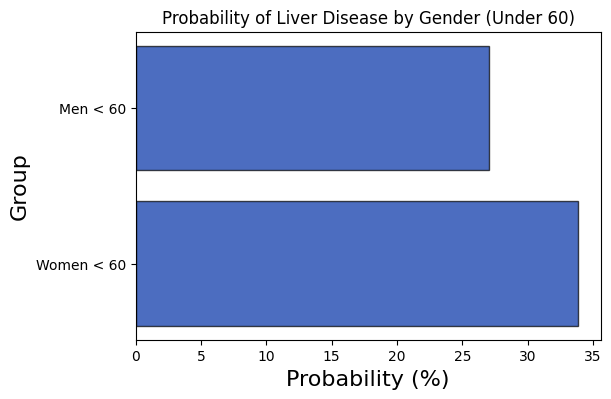

In [14]:
men_under_60_table = patients.where("Gender", are.equal_to("Male")).where("Age", are.below_or_equal_to(60))
men_under_60_with_liver_disease_table_with_liver_disease = patients.where("Gender", are.equal_to("Male")).where("Selector", are.equal_to(2)).where("Age", are.below_or_equal_to(60))
men_answer = men_under_60_with_liver_disease_table_with_liver_disease.num_rows / men_under_60_table.num_rows * 100

women_under_60_table = patients.where("Gender", are.equal_to("Female")).where("Age", are.below_or_equal_to(60))
women_under_60_with_liver_disease_table_with_liver_disease = patients.where("Gender", are.equal_to("Female")).where("Selector", are.equal_to(2)).where("Age", are.below_or_equal_to(60))
women_answer = women_under_60_with_liver_disease_table_with_liver_disease.num_rows / women_under_60_table.num_rows * 100
print("The probability of a man under the age of 60 being diagnosed with liver disease is", f"{men_answer}%",
      "\n" "While the probability for a woman under those same conditions is", f"{women_answer}%")

categories = ["Men < 60", "Women < 60"]
probabilities = [men_answer, women_answer]

prob_table = Table().with_columns(
    "Group", categories,
    "Probability of Liver Disease (%)", probabilities
)

prob_table.barh("Group", "Probability of Liver Disease (%)")
plt.title("Probability of Liver Disease by Gender (Under 60)")
plt.xlabel("Probability (%)")
plt.ylabel("Group")
plt.show()



First, I look at all the men in my data who are under 60. Then, out of just those guys, I see what percentage actually has liver disease and that becomes my men_answer. I do the exact same thing for women under 60 to get their percentage, women_answer. Once I have those two percentages, my code prints them out nicely, and I also make a bar chart so you can easily see which group's percentage is bigger. Finally, based on this data, it looks like women under 60 are more likely to have liver disease.

Below here I am plotting a graph that shows how the total amount of bilirubin (TB) in the blood changes with respect to the direct fraction of bilirubin (DB) for female subjects who suffer from liver cirrhosis. Is a high concentration of bilirubin in the blood associated with an elevated direct fraction of bilirubin?

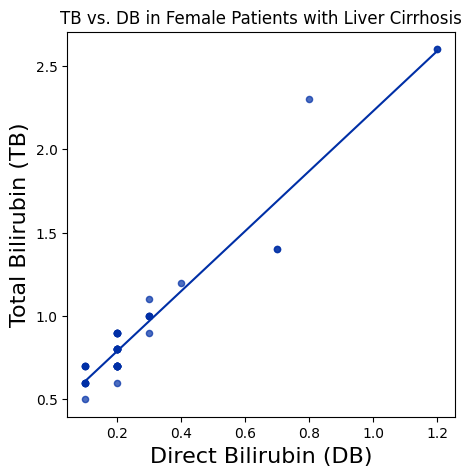

In [13]:
female_patients = patients.where("Gender", are.equal_to("Female")).where("Selector", are.equal_to(2))
female_patients.scatter("DB", "TB", fit_line=True)
plt.xlabel("Direct Bilirubin (DB)")
plt.ylabel("Total Bilirubin (TB)")
plt.title("TB vs. DB in Female Patients with Liver Cirrhosis")
plt.show()

Here I started by filtering the main data to get just the female patients with liver cirrhosis, using the 'Gender' and 'Selector' columns. With that specific data, I then made a scatter plot showing Direct Bilirubin (DB) on the x-axis and Total Bilirubin (TB) on the y-axis, and I added a line of best fit to visualize the trend. When I saw the plot, I noticed a pretty clear upward pattern: as DB levels went up, TB levels tended to rise as well, and the upward slope of the trend line definitely showed this. So, based on what I saw in the plot, I concluded that for these female patients, a high Total Bilirubin is linked to an elevated Direct Bilirubin.

I will now perform a hypothesis test.

Assuming the prevalence of liver cirrhosis is the same for both men and women in the dataset, meaning that individual probabilities will not depend on various factors and can be derived directly from the patients' gender ratio.

The null hypothesis could be that the prevalence of liver cirrhosis is the same for men and women in this data set.
The alternate hypotheses could be that the prevalence of liver cirrhosis is higher in women then in men in this data set.


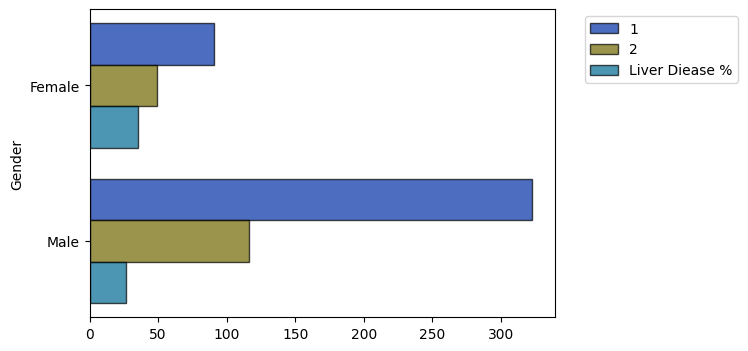

In [19]:
FMLiver = patients.pivot("Selector", "Gender")
percent= (35.0, 26.4237)
FM_w_percent = FMLiver.with_column("Liver Diease %", (percent))
FM_w_percent.barh("Gender")
FM_w_percent
print("The null hypothesis could be that the prevalence of liver cirrhosis is the same for men and women in this data set.")
print("The alternate hypotheses could be that the prevalence of liver cirrhosis is higher in women then in men in this data set.")

In [ ]:
# find percentage average males with liver disease
male2 = patients.where("Selector", 2).where("Gender", are.equal_to ('Male')).num_rows / patients.where("Gender", are.equal_to ('Male')).num_rows
print(f"The percentage of males with liver disease: {male2 * 100}%")

# find percentage average females with liver disease
female2 = patients.where("Selector", 2).where("Gender", are.equal_to ('Female')).num_rows / patients.where("Gender", are.equal_to ('Female')).num_rows
print(f"The percentage of females with liver disease: {female2 * 100}%")
FMLiver = patients.pivot("Selector", "Gender")
FM_js_percent = FM_w_percent.drop("1", "2")

The percentage of males with liver disease: 26.42369020501139%
The percentage of females with liver disease: 35.0%


### Explain your answer below:

This Data set does not support the new study that says liver cirrhosis is way more likely for men than it is for women, because in this data set out of all the women 35.0% were diagnosed with liver disease while only 26.4237% of males in this dataset were diagnosed with liver disease.


To create a visualization to display the distribution of test statistics I created a table using pivot to get a table of just the selector (which tells us if the person is healthy with a 1 or diagnosed with liver disease with a 2) and the gender. I then found the percentage of males and females with liver disease in the data set. I then added a column named "Liver Disease %" to the previous table which had the liver disease % for each gender. I then made a bar graph out of this table that should have all this data for males and females.




Now I will use the information I have to conduct an A/B Test. I will run simulations and use a p-value cutoff of 5% to determine if my observation is statistically significant

In [21]:
FMLivers = patients.select("Gender", "Selector")

In [22]:
def calculate_percentages(table, group_label):

  Females = table.where("Selector", 2).where(group_label, are.equal_to ('Female')).num_rows
  Males = table.where("Selector", 2).where(group_label, are.equal_to ('Male')).num_rows

  males = table.where(group_label, are.equal_to ('Male')).num_rows
  females = table.where(group_label, are.equal_to ('Female')).num_rows

  return (Males / males) * 100, (Females / females) * 100

def difference_of_percentages(table, group_label):

  Females = table.where("Selector", 2).where(group_label, are.equal_to ('Female')).num_rows
  Males = table.where("Selector", 2).where(group_label, are.equal_to ('Male')).num_rows

  males = table.where(group_label, are.equal_to ('Male')).num_rows
  females = table.where(group_label, are.equal_to ('Female')).num_rows

  return (Females / females) * 100 - (Males / males) * 100

def one_simulated_difference_of_percentages():
  """Returns: Difference between percent of females with liver disease and percent of males with liver disease"""
  # array of shuffled labels
  shuffled_labels = FMLivers.sample(with_replacement = False).column(0)

  # table of patients w/ & w/o liver diease and shuffled genders
  shuffled_table = FMLivers.select('Selector').with_column('Shuffled Gender', shuffled_labels)

  return difference_of_percentages(shuffled_table, 'Shuffled Gender')

In [23]:
differences = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    new_differences = one_simulated_difference_of_percentages()
    differences = np.append(differences, new_differences)

In [24]:
observed_difference = difference_of_percentages(FMLivers, 'Gender')
pvalue = np.count_nonzero(differences >= observed_difference) / repetitions

Observed Difference: 8.57630979498861
P-value: 0.0344
My observation is not statistically significant due to the fact that its p-value is of 3.2% which is lower then the p-value cut off of 5%.


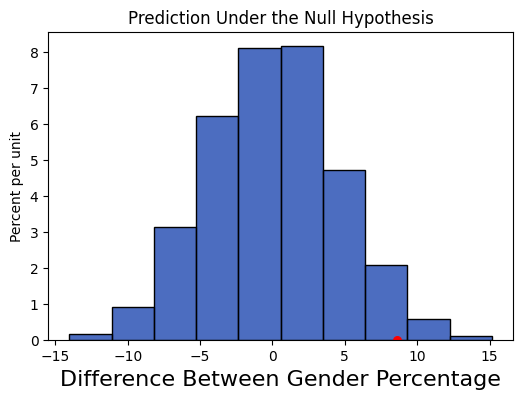

In [25]:
# SOLUTION - Isabella Farias
Table().with_column(
    'Difference Between Gender Percentage', differences
).hist()
plt.scatter(observed_difference, 0, color='red', s=30, zorder=2)
plt.title('Prediction Under the Null Hypothesis');

print('Observed Difference:', observed_difference)
print('P-value:', pvalue)
print('My observation is not statistically significant due to the fact that its p-value is of 3.2% which is lower then the p-value cut off of 5%.')

Intentionally for this problem I started by testing how to run just one simulation and I was able to do that as I followed the text book. I was stuck on how to define what I needed, which was to calculate the percentage of males and females with liver diseases. I was able to make a function that could do that, once I figured that out I realized I truly need the difference between those two percentages. Therefore I wrote a new function very similar to the previous one except this time it would find the difference between the percentage of females with liver disease and the percentage of males with liver disease. I counted by following the textbook which made a function of "one simulated difference of means" but I changed the function to work with my data and I made it so it would be "one simulated difference of percentages". I then had it run the simulation 5000 times. Following the text book still, I made a table, from the table a histogram of the differences between the genders percentages. I added a point onto the histogram which was the observed difference from the original data set. Finally I found the p-value of the original observed difference.


Now I aim to conduct a study to see whether the concentration of albumin is associated with liver cirrhosis in female subjects. I should evaluate your results by demonstrating a complete A/B testing analysis. I will state a conclusion from this test using a p-value cutoff of 5%.

In [26]:
ALB_Female = patients.where("Gender", are.equal_to ('Female')).select("Selector", "ALB")
means_table = ALB_Female.group('Selector', np.average)
means = means_table.column(1)
f_observed_difference = means.item(1) - means.item(0)

In [27]:
def difference_of_means(table, group_label):
  """Takes: name of table,
  column label that indicated the group to which the row belongs
  Returns: Difference of mean ALB of healthy and diagnosed with liver disease patients"""
  reduced = table.select('ALB', group_label)
  means_table = reduced.group(group_label, np.average)
  means = means_table.column(1)
  return means.item(1) - means.item(0)

def one_simulated_difference_of_means():
  """Returns: Difference of mean ALB of healthy and diagnosed with liver disease patients"""
  # array of shuffled selectors
  shuffled_selector = ALB_Female.sample(with_replacement = False).column(0)

  # table of ALB concentration and shuffled selectors
  shuffled_selector_table = ALB_Female.select('ALB').with_column('Shuffled Selector', shuffled_selector)

  return difference_of_means(shuffled_selector_table, 'Shuffled Selector')

In [29]:
difference = make_array()

repetitions = 5000
for i in np.arange(repetitions):
    new_difference = one_simulated_difference_of_means()
    difference = np.append(difference, new_difference)

In [30]:
Female_pvalue = np.count_nonzero(difference >= f_observed_difference) / repetitions

Observed Difference: 0.13908948194662552
P-value: 0.1768
We can conclude that the observation made from the orginal dataset is significant. We can conclude this because the p-value cutoff we
are using is 5% and the p-value of our observation from orginal dataset was 17.22%, which is greater than our p-value cutoff by 12.22%.


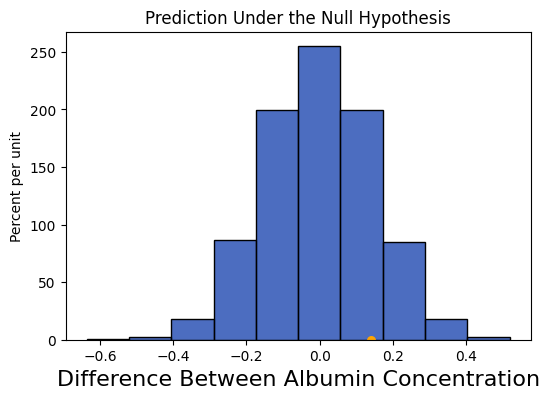

In [32]:
Table().with_column(
    'Difference Between Albumin Concentration', difference
).hist()
plt.scatter(f_observed_difference, 0, color='orange', s=30, zorder=2)
plt.title('Prediction Under the Null Hypothesis')
print('Observed Difference:', f_observed_difference)
print('P-value:', Female_pvalue)
print('We can conclude that the observation made from the orginal dataset is significant. We can conclude this because the p-value cutoff we')
print('are using is 5% and the p-value of our observation from orginal dataset was 17.22%, which is greater than our p-value cutoff by 12.22%.')

Here I observed the difference of means of the Albumin concentration in female patients, with and without liver disease. I started by making a table that only had female patients and the columns 'Selector' and 'ALB'. I then found the difference of means from the original data set which was my observed difference. I made a function very similar to the one I had originally seen in the text book, which found the difference of means of the ALbumin concentration in female patients who were healthy and diagnosed with liver disease. I then made a function where it would run a simulation that shuffled the selector, and returned the difference of the means of the new shuffled selectors from the simulation. I then ran this simulation 5000 times and made a table of the simulations from which I made a histogram. I added my observed difference from the original data set to the histogram, as an orange point. Lastly, I found the p-value of the observed difference.

Here I will design my own A/B test. I will choose one variable whose trends I'd would like to investigate, and create a new table with that variable's data for the years and states you would like to analyze. 

Overview:

* Define null and alternate hypotheses.

* Plot the observed distribution of the variable I will be observing

* State my test statistic value and what it means in the context of the problem.

I am interested in investigating whether the albumin levels in patients who are diagnosed with liver disease are varied by gender.
    Null hypothesis - Gender has no association with albumin.
    Alternative hypothesis - Gender has association with the amount of albumin in LD patients, and I hypothesize women have less albumin compared to men.
In addition to assessing different albumin levels, I want to also see the correlation strength of each variable to gender.

In [34]:
#Workflow
# Step 1

diagnosed = patients.where('Selector', are.equal_to(2))
diagnosed.show()

Age,Gender,TB,DB,Alkphos,Sgpt,Sgot,TP,ALB,A/G Ratio,Selector
17,Male,0.9,0.3,202,22,19,7.4,4.1,1.2,2
64,Male,0.9,0.3,310,61,58,7,3.4,0.9,2
25,Male,0.6,0.1,183,91,53,5.5,2.3,0.7,2
33,Male,1.6,0.5,165,15,23,7.3,3.5,0.92,2
63,Male,0.9,0.2,194,52,45,6,3.9,1.85,2
20,Male,1.1,0.5,128,20,30,3.9,1.9,0.95,2
84,Female,0.7,0.2,188,13,21,6,3.2,1.1,2
57,Male,1,0.3,187,19,23,5.2,2.9,1.2,2
38,Female,2.6,1.2,410,59,57,5.6,3,0.8,2
38,Female,2.6,1.2,410,59,57,5.6,3,0.8,2


In [35]:
#Step 2

diagnosed_fem = diagnosed.select('Gender', 'ALB', 'Selector').where('Gender', are.equal_to('Female')).where('Selector', are.equal_to(2))
diagnosed_fem.show()

Gender,ALB,Selector
Female,3.2,2
Female,3,2
Female,3,2
Female,3.9,2
Female,3.6,2
Female,2.7,2
Female,2.5,2
Female,3.3,2
Female,2.3,2
Female,2.5,2


In [36]:
#Step 3

diagnosed_male = diagnosed.select('Gender', 'ALB', 'Selector').where('Gender', are.equal_to('Male')).where('Selector', are.equal_to(2))
diagnosed_male.show()

Gender,ALB,Selector
Male,4.1,2
Male,3.4,2
Male,2.3,2
Male,3.5,2
Male,3.9,2
Male,1.9,2
Male,2.9,2
Male,2.6,2
Male,2.3,2
Male,3.2,2


In [37]:
#Step 4

Male_ = diagnosed_male.column('ALB')
Female_ = diagnosed_fem.column('ALB')

In [38]:
#Step 5

Length = min(len(Male_,), len(Female_))

In [39]:
#Step 6
Male_ALB = Male_[:Length]
Female_ALB = Female_[:Length]

In [40]:
#Step 7

Selector_ = diagnosed.column('Selector')
Selector_ALB = Selector_[:Length]

In [41]:
#Step 8

Albumin_Table = Table().with_columns('Male', Male_ALB, 'Female', Female_ALB, 'Selector', Selector_ALB)
Albumin_Table.show()

Male,Female,Selector
4.1,3.2,2
3.4,3,2
2.3,3,2
3.5,3.9,2
3.9,3.6,2
1.9,2.7,2
2.9,2.5,2
2.6,3.3,2
2.3,2.3,2
3.2,2.5,2


In [42]:
#STEP 9

MALB = np.mean(Male_ALB)
FALB = np.mean(Female_ALB)
print(MALB, FALB)

3.05102040816 3.36326530612


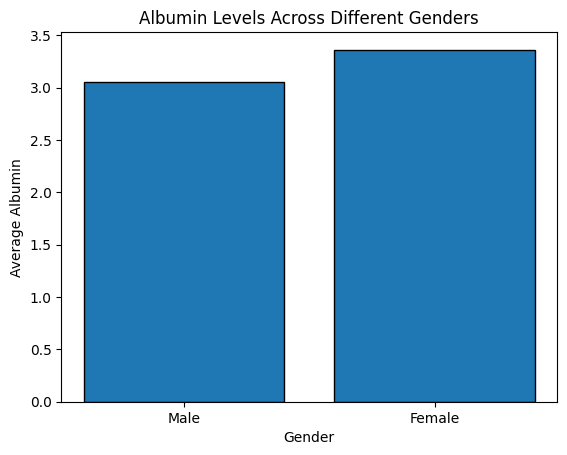

In [43]:
#Step 10 - Part B

plt.bar(['Male', 'Female'], [MALB, FALB])
plt.xlabel('Gender')
plt.ylabel('Average Albumin')
plt.title('Albumin Levels Across Different Genders')
plt.show()

Step 11 - Part C
Test Statistic Value - My test statistic value is 0.05. If the p value from the chi-square is more than 0.05, we reject the null hypothesis, and
(cnt.) if it is less, we fail to reject the null hypothesis.

I first ran the cleaned tableset I did earlier. As for my AB test I wanted to make sure there were no nan values that would skew my data. Since my experiment focused on diagnosed patients only, I filtered the cleaned dataset to show the selector to only have value of 2. Since my experiment focused on whether the association of albumin varied by gender, I wanted to create two separate tables of patients in male and female categories. To make separate tables I selected only the relevant columns (gender, albumin, selector). I wanted to compare the ALB amounts across both genders so I selected those as well. But if I wanted to compare I needed to make both columns the same length as there were probably more or less of each gender. This is so I could visualize it later for part B. Since we're dealing with quantitative values I wanted to visualize it through a bar chart. This is where I averaged out the Male Albumin and Female Albumin. Then I used this data for my bar chart.

Continue the A/B Test from earlier!
- Simulate the test statistic under the null hypothesis and visualize the results.
- Select a significance level for your test and state the conclusion of the hypothesis test.

In [44]:
#Step 1 - A

Gendered_ALB = np.append(Male_ALB, Female_ALB)
Simulated_ALB = make_array()

In [45]:
#Step 2 - A

for i in np.arange(10000):
    Shuffle = np.random.permutation(Gendered_ALB)
    Simulated_Males = Shuffle[:len(Male_ALB)]
    Simulated_Females = Shuffle[len(Female_ALB):]
    Difference = abs(np.mean(Simulated_Males) - np.mean(Simulated_Females))
    Simulated_ALB = np.append(Simulated_ALB, np.mean(Simulated_Males) - np.mean(Simulated_Females))

In [46]:
#Step 3 - A
Difference = abs(np.mean(Male_ALB) - np.mean(Female_ALB))

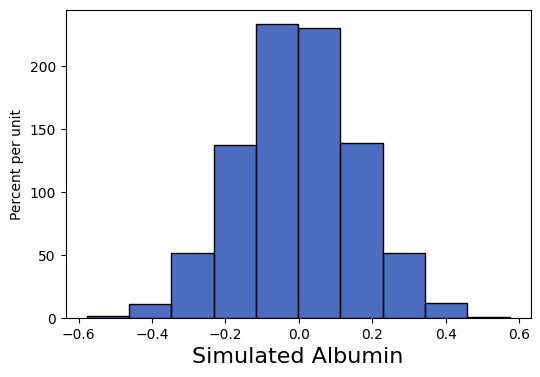

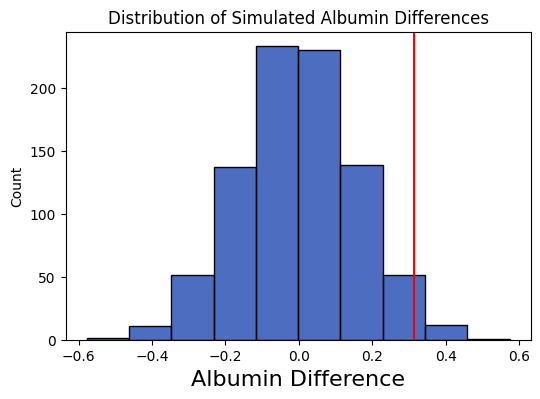

In [47]:
#Step 4 - A
Table().with_column('Simulated Albumin', Simulated_ALB).hist()
Simulation = Table().with_column('Simulated Albumin', Simulated_ALB).hist()

plt.axvline(Difference, color='red', label='Observed Albumin')
plt.title('Distribution of Simulated Albumin Differences')
plt.xlabel('Albumin Difference')
plt.ylabel('Count')
plt.show()

In [48]:
#Step 5 - B
p = np.count_nonzero(Simulated_ALB >= Difference) / len(Simulated_ALB)
print('p-value:', p)

p-value: 0.0231


Here, I wanted to simulate the association between albumin and gender on diagnosed patients so I conducted a permutation test. To make a permutation test I needed to convert the data to an array and then I combined the male and female albumin data into an array with both genders. I wanted to see differences expected by chance in response to the null hypothesis and see if things were just randomly assorted (I'm assuming there's no relationship with ALB and gender whatsoever). So I created a function that would shuffle and randomly assort the ALB from different genders 1,000 times. Then I split the data up into groups by gender. Then I calculated the mean difference between the two simulated groups. I then shuffle everything so that it would be based on random assortment. Then I created a histogram to visualize it with my simulated values compared to my observed values and compare the difference. Then I calculated the p-value and compared it to my selected p-value.

